In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
X = np.array([[0,1],[1,0],[1,1],[0,0]])
y = np.array([[1],[1],[0],[0]])

In [107]:
#Define number of nodes in each layer
num_input = 2
num_hidden = 5
num_output = 1

In [108]:
# Initializes weights and bias randomly
# First initialize from input to hidden layer
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [109]:
# Initialize from hidden to output layers
Why = np.random.randn(num_hidden,num_output)
by = np.zeros((1,num_output))

In [110]:
# Define sigmoid activation function
def sigmoid (z):
    return 1/ (1+np.exp(-z))

In [111]:
# Define derivative of sigmoid activation function
def sigmoid_derivative(z):
    return np.exp(-z)/ ((1+np.exp(-z))**2)

In [112]:
# Define Forward propogation
def forward_prop(X,Wxh,Why):
    z1 = np.dot(X,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

In [113]:
# Define the backward propogation
def backward_prop(y_hat,z1,a1,z2):
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) *sigmoid(z1)
    dJ_dWxh = np.dot(X.T,delta1)
    return dJ_dWxh,dJ_dWhy

In [114]:
# Define Cost Function
def cost_function(y,y_hat):
    J = 0.5 * sum((y-y_hat)**2)
    return J

In [115]:
# Set learning rate and number of training iterations
alpha = 0.01
num_iterations = 5000

In [116]:
cost = []
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh,dJ_dWhy =  backward_prop(y_hat,z1,a1,z2)
    
    # Update weights
    Whx = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    # Compute Cost
    c = cost_function(y,y_hat)
    cost.append(c)
    

Text(0, 0.5, 'Cost')

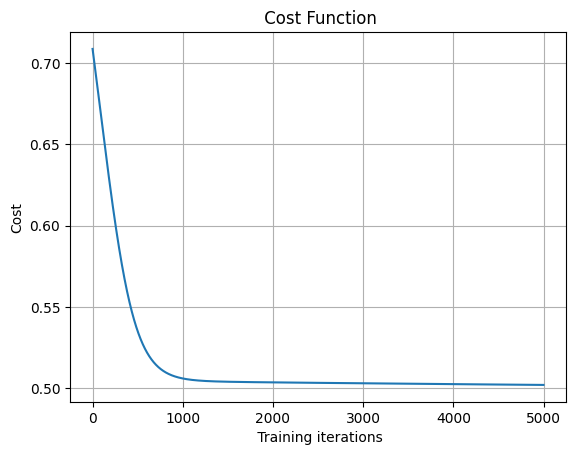

In [117]:
# Plot the cost function

plt.grid ()
plt.plot(range(num_iterations), cost)
plt.title (" Cost Function")
plt.xlabel(" Training iterations")
plt.ylabel("Cost")